In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import folium
import folium.plugins
from datetime import datetime, timedelta
import matplotlib.ticker as ticker
import matplotlib.dates as pdates

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
focuscrimes = ['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT']
data = data.loc[data['Category'].isin(focuscrimes)]

In [ ]:
def convert_wdaytime(x):
  add = timedelta(days=x['Date'].weekday())
  return x['Time2'].replace(microsecond=0, second=0, minute=0)+add

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Time2'] = data['Time'].apply(lambda x : datetime.strptime(x,"%H:%M"))
data['Hour'] = data['Time2'].dt.hour
data['wday_time'] = data.apply(convert_wdaytime,axis = 1)

# Part 1: Temporal Patterns

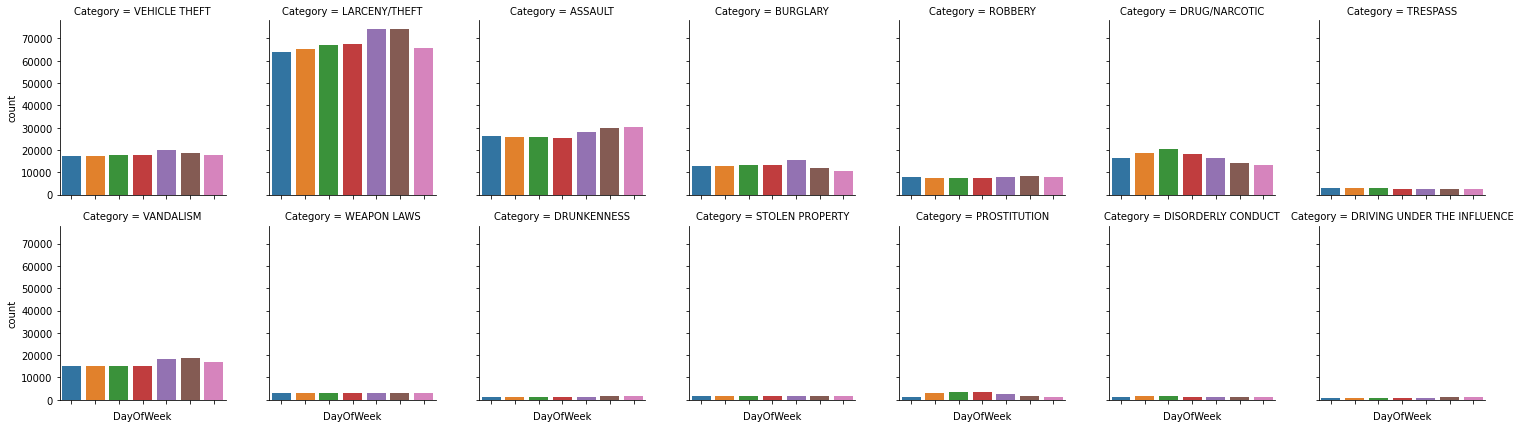

In [ ]:
sns.catplot(x='DayOfWeek',col='Category',col_wrap=7, data = data, kind='count', 
            order =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],height=3,).set(xticklabels=[])
plt.show()

##Bar plots of all categories and their occurences
It can be seen from the plots that all categories of criminal offenses have mostly the same amount of occurences on all days of the week. Some exceptions can be seen though, where "Drunkenness", "Larcency/Theft", "Assault" and "Vandalism" all occur more often during the weekend. "Drug/Narcotic" and "Prostitution" can be seen to occur more often during working days.


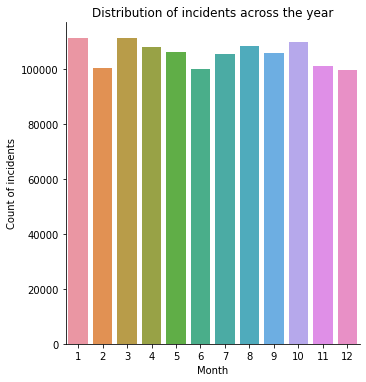

In [ ]:
ax = sns.catplot(x='Month', data = data, kind='count')
ax.set(xlabel="Month",ylabel="Count of incidents",title="Distribution of incidents across the year")
plt.show()

This bar plot, shows the amount of crimes comitted every month. It can be seen that there are some differences between each month, but little to no pattern can be explained, as the difference is rather small and seem random.

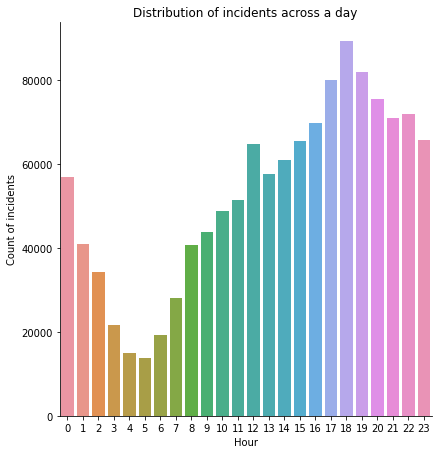

In [ ]:
ax = sns.catplot(x='Hour', data = data, kind='count',height=6)
ax.set(xlabel="Hour",ylabel="Count of incidents",title="Distribution of incidents across a day")
plt.show()

The amount of crimes commited can be seen from this bar plot, to be highly dependant on the time of day. The amount of crimes committed is low during the morning and then slowly increases untill 18. From here the amount of crimes decreases, untill the the morning again. This pattern makes a lot of sense considering the types of crimes in the dataset, as little people are awake during the night, and most people is at work during the day.


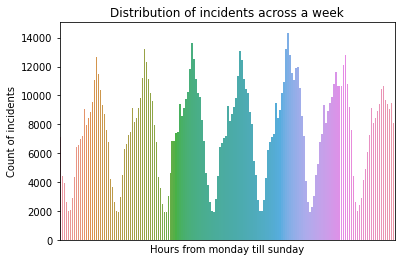

In [ ]:
ax = sns.barplot(x='wday_time',y='PdId', data = data.groupby("wday_time",as_index=False).count())
ax.set_xticks([])
ax.set(xlabel="Hours from monday till sunday",ylabel="Count of incidents",title="Distribution of incidents across a week")
plt.show()

It can be seen that the spikes on work days is much narrower. This could indicate a larger primetime for criminality on fridays and saturdays.

# Part 2: Thinking about data and visualization

## Pearson correlation:
Pearson correlation is used to measure the linear correlation between data. It has an output between -1 and 1, where -1 is negative perfect correlation, and 1 being that the data is perfectly correlated. The mathematical formula for the Pearson correlation can be written as the following,

$\rho_{X,Y} = \frac{cov(X)(Y)}{\sigma_X \sigma_Y} $

One of the problems Pearsson correlation has, is comparing a multitude of datasets as this produces a large table, which often is tedious to get any beneficial conclusion out of.

In these cases Visualization is way more beneficial, as it gives comprehensible data in a readable setting.

## Barchart and histogram
The main difference is that barcharts are used to compare variables and histograms are used to plot the distribution of variables. As shown later in the assignemnt we will use a histrogram the distributions of two different crimes given the lattitude coordinates. This means that a key difference is that it doesn't make sence to change the order of the bins in a histogram, as they come in the order as the x-axis (the independent variable) change. Where in a barchart one would have different variables at the x-axis and then their respective value for the attributes plotted on the y-axis and one could freely change the order of the variables. 

## Bin sizes

A method for chosing bin sizes are Struge's rule. It should be noted that this method have been critized for over-smoothing the histogram, so one should always pay attention to if the results seems to make good sence. The method is quite simple. It takes the number of observations **N**. It is than possible to calculate the number of class intervals **K** with the following formula:

**K** = 1 + 3.322 * log(**N**)

The output of this formula should then be rounded to nearest whole number. The size of the intervals is than the range of the data (largest observations minus smallest observation) divided by this value. If the dataset at hand is very large or severely skewed this method isn't recommended. But othervise it should work quite well.



# Part 3: Generating important plot types

In [ ]:

#Smaller timeperiod chosen:
DataSubset = data[(data['Date'] > '2004-12-31') & (data['Date'] <= '2015-05-01')]
#Get the Specific hour in mind
DataSubset = DataSubset[(DataSubset['Time']>="13:00") & (DataSubset['Time']<="14:00")]


#Specific crime chosen:
DataSubset = DataSubset[DataSubset['Category']=='VEHICLE THEFT']
#Group by time:
GroupedData = DataSubset.groupby(pd.Grouper(key='Time2')).count()


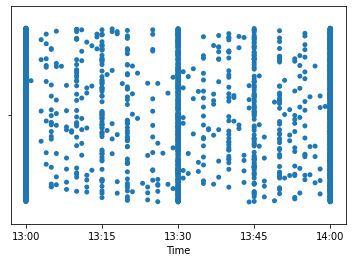

In [ ]:
#Plot JitterPlot
ax = sns.stripplot(x='Time2', data = DataSubset,jitter = 0.40)
ax.set_xlabel("Time")
ax.xaxis.set_major_locator(pdates.MinuteLocator([0,15,30,45,60]))
ax.xaxis.set_major_formatter(pdates.DateFormatter("%H:%M"))

plt.show()

From this jitterplond it looks like there is a clear trend that crimes are being reported at "nice" round times. In question 5 we will get into how that can be.

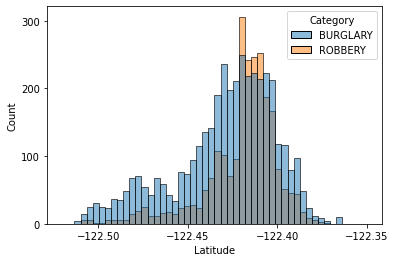

In [ ]:
#Plot Histogram
#Create new Dataset:

DataSubset2Cat = data.loc[data['Category'].isin(['BURGLARY','ROBBERY'])]
DataSubset2Cat = DataSubset2Cat[(DataSubset2Cat['Date'] > '2011-12-31') & (DataSubset2Cat['Date'] <= '2012-09-01')]

ax = sns.histplot(x='X', data = DataSubset2Cat, hue = 'Category',binrange=[-122.52,-122.35],bins = 50)
ax.set_xlabel('Latitude')
plt.locator_params(nbins=4)
plt.show()

In general there is a higher frequency of burglaries than robberies. This trend is not the case for certain latitudes. In what most be assumed to be the inner city, where the frequency are the highest for both categories, robbery is more commen, as the only place. It was a bit difficult to fint two categories with very different geografical patterns, as all the categories seemed to spike in the inner city, where there are more people, and therefore naturally more crime.

# Part 4: A bit of geo-data

In [ ]:
#Smaller timeperiod chosen:
DataSubset4 = data[(data['Date'] >= '2016-06-01') & (data['Date'] < '2016-08-01')]
#Specific crime chosen:
DataSubset4 = DataSubset4[DataSubset4['Category']=='DRUG/NARCOTIC']

In [ ]:
map = folium.Map(location=[37.77919, -122.41914],
                    zoom_start = 13)
folium.Marker([37.77919, -122.41914], popup='City Hall').add_to(map) #
map_cluster = folium.plugins.MarkerCluster().add_to(map)
for i in range(len(DataSubset4)):
  folium.Circle(radius=25, location=[DataSubset4['Y'].iloc[i],DataSubset4['X'].iloc[i]], popup=DataSubset4['Descript'].iloc[i], color = "crimson", fill=False).add_to(map_cluster)

map

The incidents are denoted with a red circle and the City Hall with the blue marker. All the incidents are clustered to avoid information overload. The information is only aggregated, when zoomed out. It can therefore be inspected on the plot. It can be seen that the majority of incidents are centered around the city center. This can be seen from the two clusters of respectively 126 and 186 incidents. One can speculate that the intensity of incidents in close proximity to the city center stems from more drug abuse, but it might also be a product of heavier police presence.

# Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.



1.   In the hourly activity for PROSTITUTION something surprising is going on on Thursday. Remind yourself here, where I've highlighted the phenomenon I'm talking about.
**It seems unlikely that there are this many prostituion cases this exact moment in time (the highlighted). The explanation could be because that the time we get from the data, isn't from when the crime happened, but when the arrest happened, and therefore when the paper work was filed. Maybe this exact point in time is from when they file paperwork the day after patrole, or because the police officers use this time when they don't know the actual time**
2.   When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself here, where I've highlighted the phenomenon I'm talking about.
**What can be seen is that for the "nice" points in time like "13:00, 13:30, 14:00" a lot more crime happened. When analysing this data, or making models based on this data, it could be concluded that a these points in time in the future crime are more likely to happen, which would most likely be wrong. It is assumede that this is just because police officerers don't know the exact time of the crime and therefore they take the closest "nice" number. Therefore one should properbly use hourly timestamps when modeling, or another time interval not as specific.**
3. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself here.
**This is most likely because this place is used when the police don't know where the crime happend they use this place, because this is where the sentence is carried out.**

